# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

In [20]:
#EDA: All dimensions in range [-1,1]
# for i in range(240):
#     if max(x_train[i])>1:
#         print(max(x_train[i]),i)
print(len(x_train))
x = np.array(x_train)
print(x.shape)



240
(240, 25)


In [70]:
# 1.3.1.2
# implement Linear Regression

def get_weight(W,lr):
    n,dim = x.shape
    dim+=1
    gradient = [0] * dim
    for i in range(n):
        pred = predictor(W,x[i])
        actual = y_train[i]
        for j in range(dim):
            x_j = 1 if j==0 else x[i][j-1]
            gradient[j] += (pred-actual)*x_j

    W_new = [0] * dim
    for i in range(dim):
        W_new[i] = W[i] - lr*(1/n)*gradient[i]
    return W_new

def predictor(W,point):
    dim = len(point)+1
    values = [0]*dim
    for i in range(dim):
        if i==0:
            values[i] = 1
        else:
            values[i] = point[i-1]

    return np.dot(W,values)

def cost_func(W):
    sum = 0.0
    # print(x.shape[0])
    for i in range(x.shape[0]):
        pred = predictor(W,x[i])
        actual = y_train[i]
        sum += (pred-actual)**2

    return sum/float(2*x.shape[0])

def gradient_descent(iter=500,lr=0.1,log=True):
    # iter = 0
    J = None
    W = [0] * (x.shape[1]+1) # np.random.rand(x.shape[1]+1)
    if log:
        print("Initial Weight matrix: ", W)
    for i in range(iter):
        J = cost_func(W)
        W = get_weight(W,lr)
        if i%100==0 and log:
            print(f"After iteration {i}, cost = {J}")

    print(f"LR = {lr}, Final J = {J}, W = {W}")
    return J,W

J,W = gradient_descent()


Initial Weight matrix:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
After iteration 0, cost = 3.0767857547310524
After iteration 100, cost = 0.10101468564026488
After iteration 200, cost = 0.02026298717408448
After iteration 300, cost = 0.011181395804385846
After iteration 400, cost = 0.008073721806471675
LR = 0.1, Final J = 0.006320634577527676, W = [-0.9184322501656855, -4.825471646349365, 0.27206633588178847, -1.119622219587755, 0.049757348361047254, -0.21906977818192802, -0.08898817060643663, 0.05374561792628198, -0.14911729615360753, 0.1389703115131544, -0.16623229036403814, 0.1588536766847644, -0.1624777880077793, 0.15431100650223697, -0.14953047011519915, 0.1407659381583284, -0.13321772082871575, 0.1244712436350185, -0.11634672812933954, 0.10804364724247481, -0.10020469138853083, 0.09255688839482092, -0.08532277748282605, 0.078401049662485, -0.07186141393038543, 0.065658053672789]


In [58]:
# 1.3.2.3
# try with different learning rates and choose the best one
lrs = [0.1,0.001,0.0005,0.0002,0.0001]
W_pred = None
J_min = 1e6
lr_f = lrs[0]

for lr in lrs:
    print("Learning rate")
    J,W = gradient_descent(100,lr,False)
    if J<J_min:
        J_min = J
        W_pred = W
        lr_f = lr

print(f"Best performance at lr = {lr_f}")

Learning rate
LR = 0.1, Final J = 0.030246371183608272, W = [-1.0192200117947199, -4.373553481529625, 0.6785917792135442, -1.0655852367711784, 0.370095487600156, -0.26427210988246047, 0.7153319546582747, 0.6532939362299734, 0.26253341937792285, 0.23391573679638658, 0.6173204941455226, 0.9753343512514638, -0.02629867151987088, 0.40027328584639776, 0.36630281761119315, 0.6423915901332324, -0.1367158029541047, 0.3385672779683631, 0.4373900261299851, 0.992314447117466, 0.38016564468221253, 0.4851596574687527, -0.046003640448241, 0.4927384041018739, 0.6765494294255571, 0.8210754886470192]
Learning rate
LR = 0.001, Final J = 2.6256185452630922, W = [0.2257749352798939, -0.07279089970756926, 0.13934617738765953, -0.08378024779191359, 0.7920745927304541, 0.17383416472922855, 0.777459087263268, -0.03832069201056653, 0.7242743775675164, 0.8094028572173092, 0.21616325918612447, 0.23895555718939432, 0.3740541832717099, 0.9563346025999713, 0.626800991525969, -0.0146072889885, 0.4863029367076872, 0.

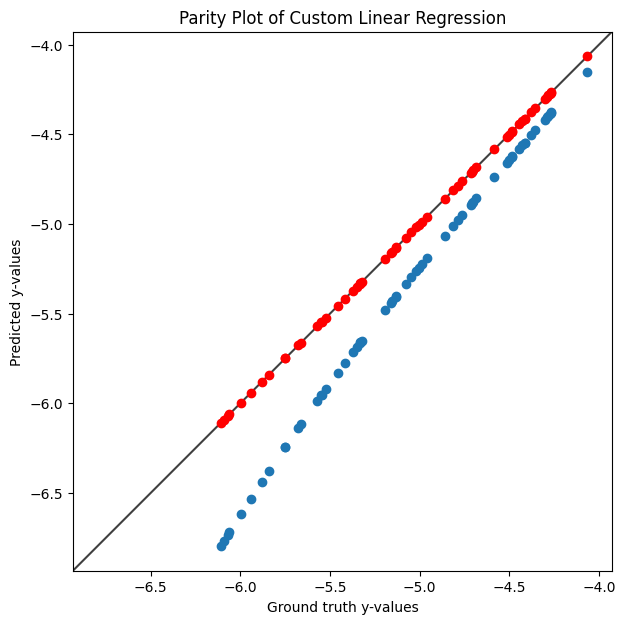

In [71]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
 
y_pred2 = regressor.predict(x_test) 

y_pred = []
for x_sample in x_test:
    y_pred.append(predictor(W,x_sample))

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)
ax.scatter(y_test, y_pred2,facecolor='red')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

* In ridge regression, we apply a regularization term to the cost function (J) that is a squared function of the weight terms in order to have smaller values of the weights and thus prevent overfitting to the data. Our new cost, J becomes: J = (1/n)*(WTx-y)^2 + alpha * (Wt*W)

In [72]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn

def cost_func_ridge(W,alpha):
    sum = 0.0
    for i in range(x.shape[0]):
        pred = predictor(W,x[i])
        actual = y_train[i]
        sum += (pred-actual)**2

    reg = 0.0
    for i in range(x.shape[1]+1):
        reg += W[i]**2

    return sum/float(2*x.shape[0]) + alpha*reg

def gradient_descent(alpha=0.2):
    iter = 500
    lr = 0.1
    J = None
    W = [0] * (x.shape[1]+1)
    for i in range(iter):
        J = cost_func_ridge(W,alpha)
        W = get_weight(W,lr)
    return J,W

for alpha in [0.001,0.002,0.005,0.01,0.1]:
    if alpha==0.001:
        J,W = gradient_descent(alpha)
    else:
        J,_ = gradient_descent(alpha)
    print(f"alpha = {alpha}, RMSE = {J}")
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

alpha = 0.001, RMSE = 0.032121806474263964
alpha = 0.002, RMSE = 0.05792297837100025
alpha = 0.005, RMSE = 0.1353264940612091
alpha = 0.01, RMSE = 0.26433235354489054
alpha = 0.1, RMSE = 2.5864378242511563


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

* The alpha controls the amount of penalty contributed by the regularization term, that is, allows us to give a higher importance to the gradient term during learning. It also helps control multicollinearity, which occurs when there are high correlations between more than two predicted variables, thus giving some deceptive values of high accuracy on the training set. Thus it helps better fitting on the test data, reducing the variance among data and thus reducing the overall least squared error (MSE).

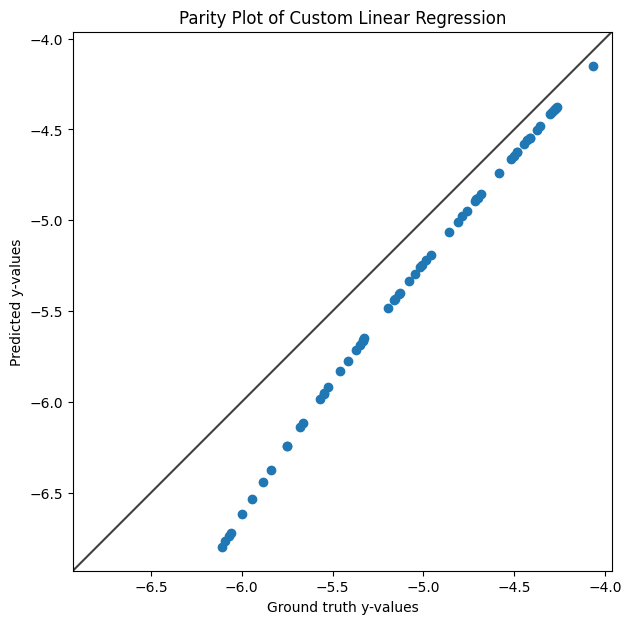

In [73]:
# 1.3.2.4
y_pred = []
for x_sample in x_test:
    y_pred.append(predictor(W,x_sample))

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

* The idea behind Lasso regression is similar to that of Ridge regression, whereby we add some penalty term to higher weights to prevent overfitting on the data. However, this term is the sum of absolute values of the weight coefficients, and thus gradient descent can make some of the weights reduce completely to 0, thereby eliminating some dimensions in predicting y itself.

In [78]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
def cost_func_lasso(W,alpha):
    sum = 0.0
    # print(x.shape[0])
    for i in range(x.shape[0]):
        pred = predictor(W,x[i])
        actual = y_train[i]
        sum += (pred-actual)**2

    reg = 0.0
    for i in range(x.shape[1]+1):
        reg += abs(W[i])

    return sum/float(2*x.shape[0]) + alpha*reg

def gradient_descent(alpha=0.2):
    iter = 1000
    lr = 0.1
    J = None
    W = [0] * (x.shape[1]+1)
    for i in range(iter):
        J = cost_func_lasso(W,alpha)
        W = get_weight(W,lr)
    return J,W

for alpha in [0.001,0.002,0.005,0.01,0.1]:
    if alpha==0.001:
        J,W = gradient_descent(alpha)
    else:
        J,_ = gradient_descent(alpha)
    print(f"alpha = {alpha}, RMSE = {J}")

alpha = 0.001, RMSE = 0.012232074421815784
alpha = 0.002, RMSE = 0.02157113618740925
alpha = 0.005, RMSE = 0.04958832148418964
alpha = 0.01, RMSE = 0.09628363031215696
alpha = 0.1, RMSE = 0.9367991892155687


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

* The benefit of lasso regression over linear regression comes from the bias-variance tradeoff in the MSE error. As `alpha` increases, variance drops substantially with very little increase in bias, thus the effect is there is a significant penalty on the coefficients of W. MSE is lowest when we choose a value for alpha that produces an optimal tradeoff between bias and variance, that is when alpha is increased upto a certain limit. Lasso regression is capable of producing “sparse” models – models that only include a subset of the independent variables in features, as alpha is tweaked, unlike ridge regression, where the coefficients can never shrink to 0.

When alpha = 0, the penalty term in lasso regression has no effect and thus it produces the same coefficient estimates as linear regression. 

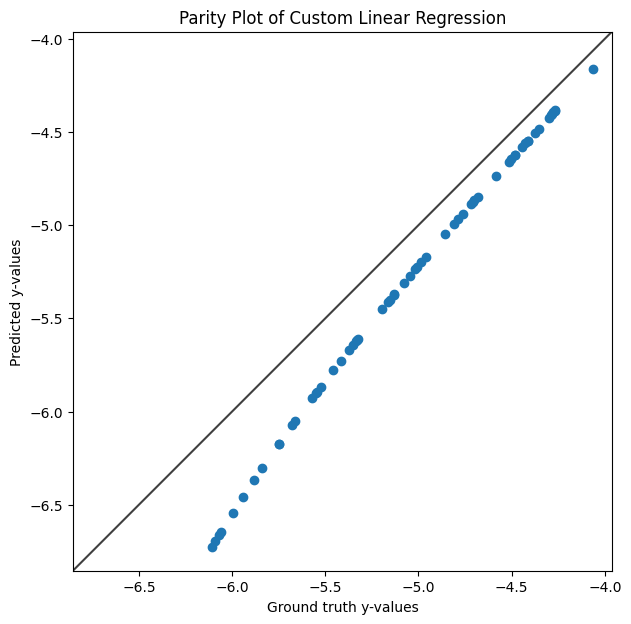

In [80]:
# 1.3.3.4
_,W = gradient_descent(0.0001)
y_pred = []
for x_sample in x_test:
    y_pred.append(predictor(W,x_sample))

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()